Using TensorFlow backend.


(50000, 28, 28) (50000,)


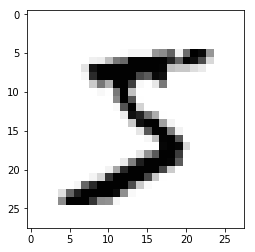

In [1]:
from preprocessed_mnist import load_dataset
X_train, y_train, X_val, y_val, X_test, y_test = load_dataset()
print(X_train.shape, y_train.shape)
import matplotlib.pyplot as plt
%matplotlib inline
plt.imshow(X_train[0], cmap="Greys");

In [2]:
import numpy as np
import tensorflow as tf

In [3]:
X_train.shape

(50000, 28, 28)

In [4]:
X_train = X_train.reshape([50000,784])
X_test = X_test.reshape([10000,784])

In [5]:
n_x = X_train.shape[1]   # number of nodes in the input layer
n_h = 64                #number of nodes in the hidden layer
n_y = 10                #number of nodes in the output layer

In [6]:
# placeholders for input values
X = tf.placeholder(tf.float32, shape=(None, 784),name="input")
Y = tf.placeholder(tf.float32, shape=(None,10))

In [7]:
# initialize the weights and bias
W1 = tf.get_variable("W1",[n_x,n_h],initializer=tf.contrib.layers.xavier_initializer())
b1 = tf.get_variable("b1",[n_h],initializer=tf.zeros_initializer())
W2 = tf.get_variable("W2",[n_h,n_y],initializer=tf.contrib.layers.xavier_initializer())
b2 = tf.get_variable("b2",[n_y],initializer=tf.zeros_initializer())

In [8]:
Z1 = tf.matmul(X,W1) + b1
A1 = tf.nn.relu(Z1)
Z2 = tf.matmul(A1,W2) + b2
A2 = tf.nn.sigmoid(Z2)

In [9]:
def compute_cost(y_pred,y_true):
    cost = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(labels=y_true, logits=y_pred))
    return cost

In [10]:
cost = compute_cost(A2,Y)
lr = 0.03
optimizer = tf.train.AdamOptimizer(lr).minimize(cost)
init = tf.global_variables_initializer()

In [11]:
y_train = np.eye(10)[y_train]
y_test = np.eye(10)[y_test]

Test cost after 10 epochs: 1.49573
Test cost after 20 epochs: 1.48821
Test cost after 30 epochs: 1.48417
Test cost after 40 epochs: 1.4849
Test cost after 50 epochs: 1.48861
Test cost after 60 epochs: 1.48566
Test cost after 70 epochs: 1.48436
Test cost after 80 epochs: 1.48182
Test cost after 90 epochs: 1.48155
Test cost after 100 epochs: 1.48099


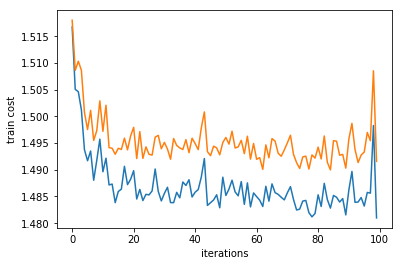

Train Accuracy: 0.97598
Test Accuracy: 0.9658


In [12]:
batch_size = 500
with tf.Session() as sess:
    sess.run(init)
    train_costs = []
    test_costs = []
    for epoch in range(100):
        for i in range(0, 50000, batch_size):
            sess.run(optimizer, feed_dict={X:X_train[i:i+batch_size], Y:y_train[i: i+batch_size]})
        train_costs.append(sess.run(cost, feed_dict={X:X_train, Y:y_train}))
        test_costs.append(sess.run(cost, feed_dict={X:X_test, Y:y_test}))
        if epoch%10 == 9:
            print("Test cost after " + str(epoch+1)+ " epochs: "+ str(train_costs[-1]))
    iterations = list(range(100))
    plt.plot(iterations, train_costs, label='Train')
    plt.plot(iterations, test_costs, label='Test')
    plt.ylabel('cost')
    plt.xlabel('iterations')
    plt.show()
    
    # Calculate the correct predictions
    predict_op = tf.argmax(Z2, 1)
    correct_prediction = tf.equal(predict_op, tf.argmax(Y, 1))

    # Calculate accuracy on the test set
    accuracy = tf.reduce_mean(tf.cast(correct_prediction, "float"))
    train_accuracy = accuracy.eval({X: X_train, Y: y_train})
    test_accuracy = accuracy.eval({X: X_test, Y: y_test})
    print("Train Accuracy:", train_accuracy)
    print("Test Accuracy:", test_accuracy)